In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc("image", cmap="gray", interpolation="nearest")

First load the patterns, and display them. There are a few numbers, plus "HI", plus a smiley face:

<IPython.core.display.Javascript object>


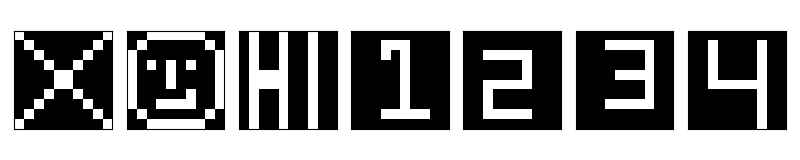

In [11]:
f = np.load("patterns.npz")

# extract the labels and data
labels = sorted(f.keys())
data = np.array([f[key].reshape((10, 10)).T.ravel() for key in labels])

# reverse numbers
data[labels.index('num1')] = 1 - data[labels.index('num1')]
data[labels.index('num2')] = 1 - data[labels.index('num2')]
data[labels.index('num3')] = 1 - data[labels.index('num3')]
data[labels.index('num4')] = 1 - data[labels.index('num4')]

# display them
fig, axes = plt.subplots(1, 7)
for j in range(7):
    axes[j].imshow(data[j].reshape((10, 10)))
    axes[j].set_xticks([])
    axes[j].set_yticks([])
fig.set_size_inches(10, 2, forward=True)
plt.tight_layout()

Define some helper functions:

In [9]:
def sigmoid(x):
    """Sigmoid function"""
    return 1.0 / (1.0 + np.exp(-x))

def dsigmoid(x):
    """Derivative of the sigmoid function"""
    return sigmoid(x) * (1 - sigmoid(x))

def add_noise(X0, p=0.5):
    """Adds random zero-masking noise"""
    X1 = X0.copy()
    idx = np.random.rand(*X1.shape) < 0.5
    X1[idx] = 0
    return X1

def init_plotting(data, M, N):
    """Initialize figure and subplots"""
    fig, axes = plt.subplots(4, 7)
    axes = axes.T
    ims = np.empty(axes.shape, dtype=object)
    for j in range(k):
        ims[j, 0] = axes[j, 0].imshow(data[j].reshape((10, 10)))
        ims[j, 1] = axes[j, 1].imshow(M[j].reshape((10, 10)))
        ims[j, 2] = axes[j, 2].imshow(N[:, j].reshape((10, 10)))
        ims[j, 3] = axes[j, 3].imshow(data[j].reshape((10, 10)))

    for ax in axes.flat:
        ax.set_xticks([])
        ax.set_yticks([])
        
    axes[0, 0].set_ylabel("Corrupted input")
    axes[0, 1].set_ylabel("Encoder weights")
    axes[0, 2].set_ylabel("Decoder weights")
    axes[0, 3].set_ylabel("Decoded image")

    fig.set_size_inches(12, 7, forward=True)
    plt.tight_layout()
    return fig, axes, ims

def draw(fig, data, M, bM, N, bN):
    """Draw the current weights, as well as an example
    corrupted input and reconstruction from that input.
    
    """
    k = data.shape[0]
    for j in range(k):        
        X1 = add_noise(data[[j]])

        # compute hidden representation
        Y = sigmoid(np.dot(M, X1.T) + bM)
        # reconstruct the input
        X2 = sigmoid(np.dot(N, Y) + bN).T

        ims[j, 0].set_data(X1.reshape((10, 10)))
        ims[j, 1].set_data(M[j].reshape((10, 10)))
        ims[j, 2].set_data(N[:, j].reshape((10, 10)))
        ims[j, 3].set_data(X2.reshape((10, 10)))

    fig.canvas.draw()

<IPython.core.display.Javascript object>


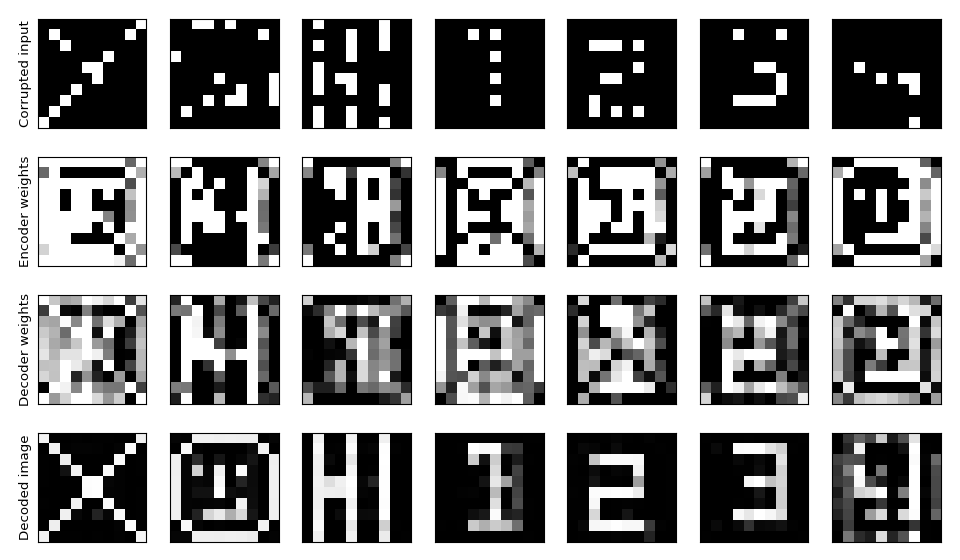

/Users/jhamrick/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


In [10]:
alpha = 0.01
M = np.random.randn(7, 100)
bM = np.random.randn(7, 1)
N = np.random.randn(100, 7)
bN = np.random.randn(100, 1)
k = data.shape[0]

fig, axes, ims = init_plotting(data, M, N)

for i in range(10000):
    for j in range(k):
        X0 = data[[j]]
        X1 = add_noise(data[[j]])

        # compute hidden representation
        Y = sigmoid(np.dot(M, X1.T) + bM)
        # reconstruct the input
        X2 = sigmoid(np.dot(N, Y) + bN).T

        # do backpropagation to compute weight
        # updates
        d1 = 2 * (X0 - X2) * dsigmoid(X2)
        dN = alpha * np.dot(d1.T, Y.T)
        dbN = alpha * d1.sum(axis=1)[:, None]
        d0 = np.dot(d1, N).T * dsigmoid(Y)
        dM = alpha * np.dot(d0, X0)
        dbM = alpha * d0.sum(axis=1)[:, None]

        # update weights
        N += dN
        bN += dbN
        M += dM
        bM += dbM

    # update plots every 100 steps
    if (i % 100) == 0:
        draw(fig, data, M, bM, N, bN)